<a href="https://colab.research.google.com/github/egonik-unlp/glotaran_preprocessing/blob/main/glotaran_preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded_files=files.upload()
!rm -rf results
!mkdir results

Saving MOF1 DMSO Ar 350 700 nm 1000us.txt to MOF1 DMSO Ar 350 700 nm 1000us.txt
Saving mof1dmsoar350750.txt to mof1dmsoar350750.txt


  adding: content/results/ (stored 0%)
  adding: content/results/MOF1 DMSO Ar 350 700 nm 1000us_glotaran.ascii (deflated 66%)
  adding: content/results/mof1dmsoar350750_glotaran.png (deflated 7%)
  adding: content/results/MOF1 DMSO Ar 350 700 nm 1000us_glotaran.png (deflated 7%)
  adding: content/results/mof1dmsoar350750_glotaran.ascii (deflated 66%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

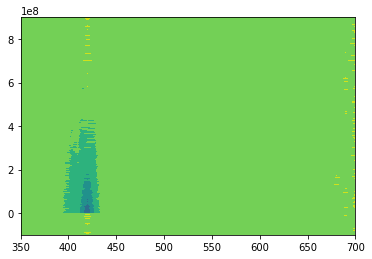

In [2]:
#@title Conversor a formato Glotaran {display-mode: "form"}

# This code will be hidden when the notebook is loaded.


#!/usr/bin/env python
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import sys
import re


class Glotafile:
    def __init__(self, file, fraction=.10):
        self.file=file
        self.fraction=fraction

    def parse_wavelengths(self):
        file=open(self.file)
        list_of_lines=[line for line in file if line != "\n"]
        wavelengths_=list_of_lines[1].split(",")[1:-1]
        wavelengths_proc=[float(re.findall(r"\d*\.\d*",wavelength)[0]) for wavelength in wavelengths_]
        wavelengths_proc.append("")
        wavelengths=np.array(wavelengths_proc)
        file.close()
        return wavelengths
    @property
    def headers(self):
        wavelengths=self.parse_wavelengths()
        headers_=np.full((int(wavelengths.shape[0]),4),"",dtype=object)
        headers_[0]=[self.file,"Holi","wavelength explicit","intervalnr {}".format(wavelengths.shape[0]-1)]
        return np.vstack((headers_.T,wavelengths))
    @property
    def body(self):
        data_array=pd.read_csv(self.file, sep=',', header=None, skiprows=11).to_numpy()
        time=data_array[:,0]*1000
        time=(time - time[int(time.shape[0]*self.fraction)]).reshape(-1,1)
        decays=data_array[:,1:-1]
        return np.hstack((time, decays))


    def build(self, filename=None):
        if not filename:
            filename="results/{}_glotaran.ascii".format(self.file[:-4])
        data=np.vstack((self.headers,self.body))
        np.savetxt(filename, data, fmt="%s", delimiter='\t')
        return data, filename
def plot(glo, filename):
  yy,xx=np.meshgrid(glo[5:,0], pd.to_numeric(glo[4,:-1]))
  plt.contourf(xx,yy, glo[5:,1:].T)
  plt.savefig("{}.png".format(filename[:-6]))



for file in uploaded_files.keys():
  glo,filename=Glotafile(file).build()
  plot(glo, filename)
!zip -r results.zip /content/results/
files.download("results.zip")